<a href="https://colab.research.google.com/github/JUKYUNGYOO/image/blob/master/Image_threshoulding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# 
cv2.threshold(image,thresh,max_value,type)
임계값을 기준으로 흑/백으로 분류하는 함수 
- image : 처리할 Gray Scale이미지
- thresh : 임계 값(전체 픽셀에 적용)
- max_value : 임계 값을 넘었을 때 적용 할 값
- type : 임계점을 처리하는 방식


THRESH_BINARY : 임계 값보다 크면 max_value,작으면 0
THRESH_BINARY_INV : 임계 값보다 작으면 max_value, 크면 0 
THRESH_TRUNC : 임계 값보다 크면 임계 값, 작으면 그대로 
THRESH_TOZERO : 임계 값보다 크면 그대로, 작으면 0
THRESH_TOZERO_INV : 임계 값보다 크면 0, 작으면 그대로 
```



In [0]:
 from google.colab import files
 uploaded = files.upload()

Saving gray_image.jpg to gray_image.jpg


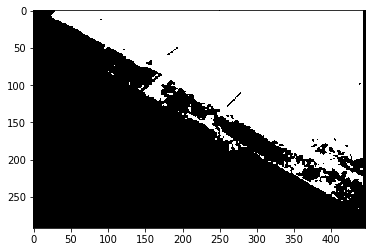

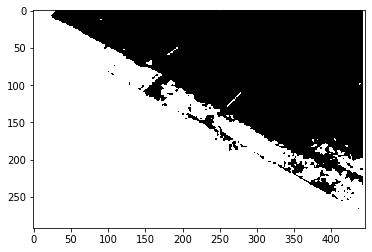

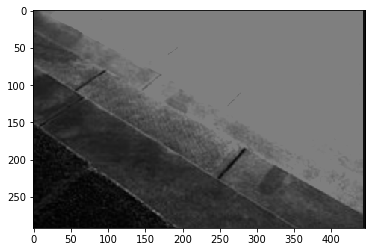

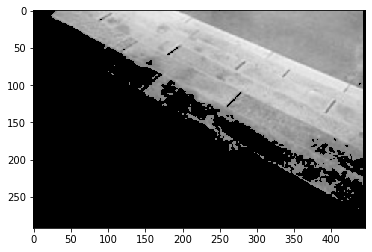

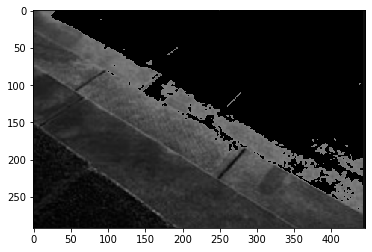

In [0]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg',cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
# 밝기가 127이상인 경우에는 백색,그렇지 않으면 흑색으로 바꾼다. 
ret, thres2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i,cv2.COLOR_GRAY2RGB))
  plt.show()






```
# cv2.adaptiveThreshold(image,max_value,adaptive_method,type,block_size,C)
적응 임게점 처리 함수 
max_value : 임계 값을 넘었을 때 적용할 값
adaptive_method : 임계 값을 결정하는 계산방법
ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
ADAPTIVE_THRESH_GAUSSIAN_C
type : 임계점을 처리하는 방식
block_size : 임계 값을 적용할 영역의 크기 
C : 평균이나 가중 평균에서 차감할 값

Adaptive Threshold를 이용하면 전체 픽셀을 기준으로 임계값을 적용하지 않는다. 

```



```
# 
ADAPTIVE_THRESH_MEAN_C
- 적용할 픽셀(x,y)를 중심으로 하는
 Block Size * Block Size 안에 있는 픽셀 값의 평균에서 C를 뺀 값을 임계점으로 설정 
```



```
# ADAPTIVE_THRESH_GAUSSIAN_C
- 적용할 픽셀(x,y)를 중심으로 하는
Block Size * Block Size 안에 있는 
Gaussian 윈도우 기반의 가중치들의
합에서 C를 뺀 값을 임계점으로 설정 

1 4 1
4 7 4
1 4 1

정규분포에 따라 정가운데 값이 가장 크다.
```







In [0]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing_image.jpg to hand_writing_image.jpg


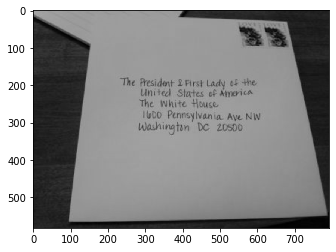

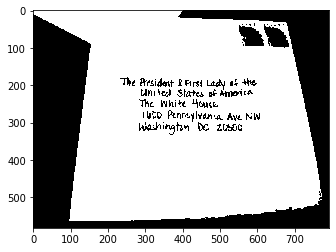

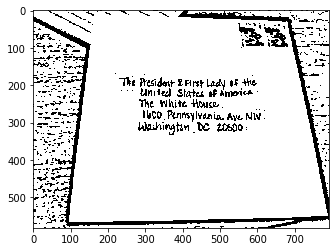

In [0]:
import cv2
image = cv2.imread('hand_writing_image.jpg',cv2.IMREAD_GRAYSCALE)
ret,thres1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,3)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres1,cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres2,cv2.COLOR_GRAY2RGB))
plt.show()
